In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
import pylab
from sklearn.neighbors import KernelDensity
import scipy
import tensorflow as tf
import sklearn
from sklearn.datasets import load_iris
import random

In [ ]:
ip install kaggle

#21 eda

In [ ]:
!wget https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv

--2021-04-21 12:49:34--  https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3716 (3.6K) [text/plain]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   3.63K  --.-KB/s    in 0s      

2021-04-21 12:49:34 (48.7 MB/s) - ‘iris.csv’ saved [3716/3716]



In [ ]:
iris = pd.read_csv('iris.csv')

In [ ]:
iris.shape

(150, 5)

In [ ]:
iris

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

In [ ]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
iris['species'].value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


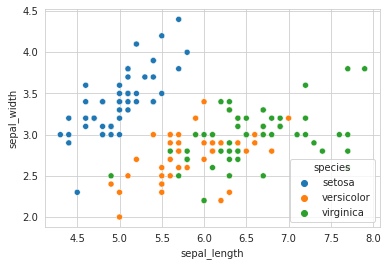

In [ ]:
sns.set_style('whitegrid')
sns.scatterplot('sepal_length','sepal_width',data=iris,hue='species')

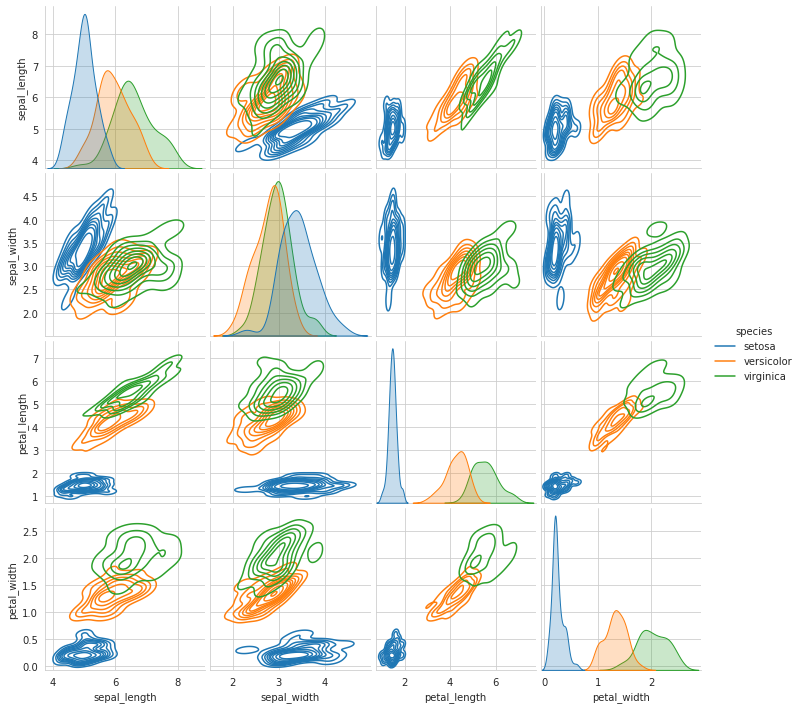

In [ ]:
sns.pairplot(data=iris,hue='species',kind='kde')

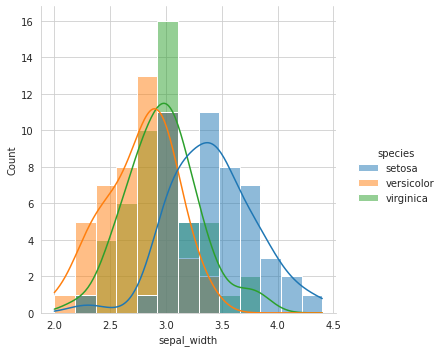

In [ ]:
sns.displot(data=iris,x='sepal_width',hue='species',kde=True)

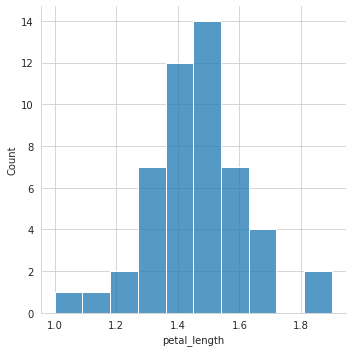

In [ ]:
sns.displot(iris[iris['species']=='setosa']['petal_length'])

In [ ]:
counts, bins = np.histogram(iris[iris['species']=='setosa']['petal_length'],bins=9,density=True)
iris[iris['species']=='setosa']['petal_length'].value_counts()

1.5    14
1.4    12
1.3     7
1.6     7
1.7     4
1.2     2
1.9     2
1.1     1
1.0     1
Name: petal_length, dtype: int64

In [ ]:
iris[iris['species']=='setosa']['petal_length'].value_counts() #1 gives density 

1.5    14
1.4    12
1.3     7
1.6     7
1.7     4
1.2     2
1.9     2
1.1     1
1.0     1
Name: petal_length, dtype: int64

In [ ]:
counts #how counts is 0.2

array([0.2, 0.2, 0.4, 1.4, 2.4, 2.8, 1.4, 0.8, 0.4])

In [ ]:
pdf= counts/(sum(counts))
pdf

array([0.02, 0.02, 0.04, 0.14, 0.24, 0.28, 0.14, 0.08, 0.04])

In [ ]:
cdf = np.cumsum(pdf)
cdf

array([0.02, 0.04, 0.08, 0.22, 0.46, 0.74, 0.88, 0.96, 1.  ])

In [ ]:
bins

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9])

In [ ]:
1.1-1

0.10000000000000009

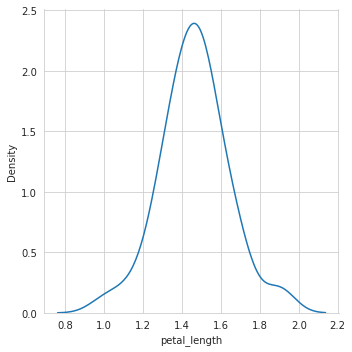

In [ ]:
sns.displot(iris[iris['species']=='setosa']['petal_length'],kind='kde')

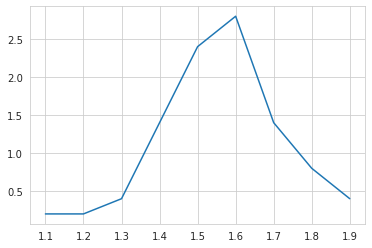

In [ ]:
plt.plot(bins[1:],counts)

In [ ]:
1+1+2+7+12+14+7+4+2

50

In [ ]:
1/50

0.02

In [ ]:
iris[iris['species']=='setosa']['petal_length']

In [ ]:
counts, bins = np.histogram(iris[iris['species']=='setosa']['petal_length'],bins=9)

In [ ]:
print(counts, len(counts))
print(bins, len(bins))


[ 1  1  2  7 12 14  7  4  2] 9
[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9] 10


In [ ]:
pdf = counts/sum(counts)
pdf

array([0.02, 0.02, 0.04, 0.14, 0.24, 0.28, 0.14, 0.08, 0.04])

In [ ]:
sns.displot()

In [ ]:
counts, bins = np.histogram(iris[iris['species'] =='setosa']['petal_length'],bins =9,density = True)

In [ ]:
iris[iris['species'] =='setosa']['petal_length'].value_counts()

1.5    14
1.4    12
1.3     7
1.6     7
1.7     4
1.2     2
1.9     2
1.1     1
1.0     1
Name: petal_length, dtype: int64

In [ ]:
print(counts)
print(bins)

[0.2 0.2 0.4 1.4 2.4 2.8 1.4 0.8 0.4]
[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9]


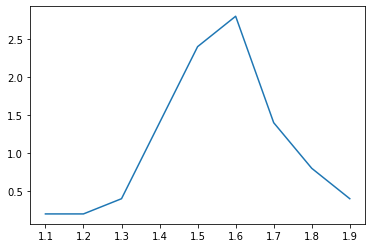

In [ ]:
plt.plot(bins[1:],counts)


In [ ]:
pdf = counts/sum(counts)
pdf

array([0.02, 0.02, 0.04, 0.14, 0.24, 0.28, 0.14, 0.08, 0.04])

In [ ]:
c,b = np.histogram(iris[iris['species'] =='setosa']['petal_length'],bins =20,density = True)
pc = c/sum(c)
cc = np.cumsum(pc)

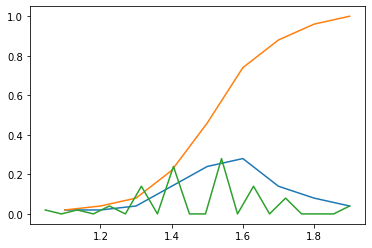

In [ ]:
plt.plot(bins[1:],pdf)
plt.plot(bins[1:],cdf)
plt.plot(b[1:],pc)


In [ ]:
cdf= np.cumsum(pdf)
cdf

array([0.02, 0.04, 0.08, 0.22, 0.46, 0.74, 0.88, 0.96, 1.  ])

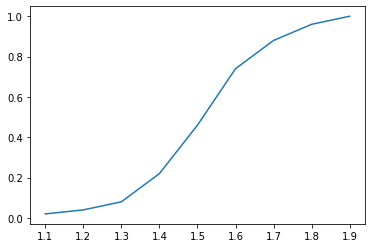

In [ ]:
plt.plot(bins[1:],cdf)

(array([5., 5., 7., 2., 1.]),
 array([ 1., 11., 21., 31., 41., 51.]),
 <a list of 5 Patch objects>)

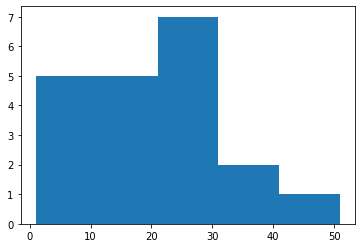

In [ ]:
a= [1, 2, 3, 5, 10,11, 12, 13, 14, 15, 21,23, 25, 26, 27, 29, 30,31, 35, 51]
plt.hist(a,bins=5)

In [ ]:
np.var([1,5,8])

8.222222222222221

In [ ]:
np.percentile(a,25)

10.75

In [ ]:
stats.percentileofscore(a,10.75)

25.0

In [ ]:
np.quantile(a,0.25)

10.75

In [ ]:
a = [2,2,3,4,5,5,5,6,7,8,8,8,8,8,9,9,10,11,11,12,13,14,14,14,15]
len(a)

25

In [ ]:
stats.percentileofscore(a,3,kind='strict')

8.0

In [ ]:
2/25

0.08

In [ ]:
iris

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

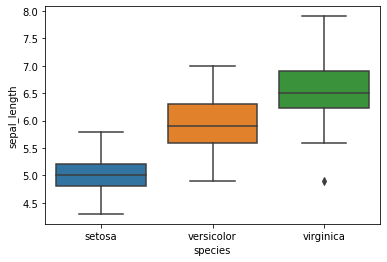

In [ ]:
sns.boxplot(x='species',y='sepal_length',data=iris)

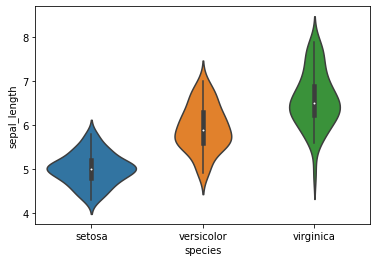

In [ ]:
sns.violinplot(x='species',y='sepal_length',data=iris)

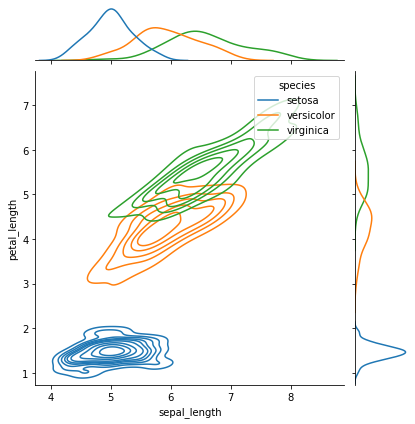

In [ ]:
sns.jointplot(x='sepal_length',y='petal_length',data=iris,kind = 'kde',hue='species')

#21 linear algebra

In [ ]:
W.t.x

#22 prob and stats

In [ ]:
np.random.seed(12)
g = np.random.normal(loc=0,scale=1,size=1000)

In [ ]:
for i in range(1,101):
  print(np.percentile(g,i))

(array([0.003, 0.016, 0.051, 0.185, 0.392, 0.657, 0.864, 0.967, 0.992,
        1.   ]),
 array([-3.71067945, -3.02295582, -2.33523219, -1.64750857, -0.95978494,
        -0.27206131,  0.41566232,  1.10338595,  1.79110958,  2.4788332 ,
         3.16655683]),
 <a list of 10 Patch objects>)

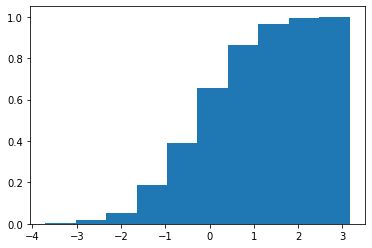

In [ ]:
plt.hist(g,density = True)

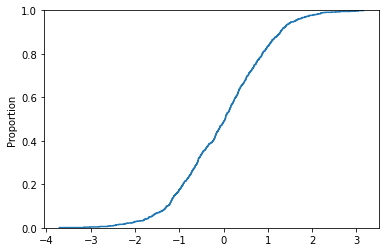

In [ ]:
sns.ecdfplot(g)

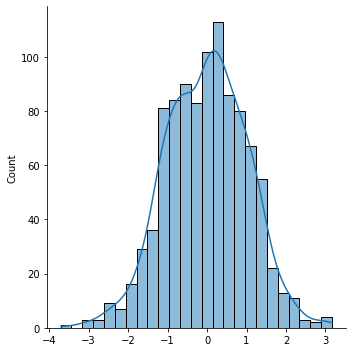

In [ ]:
sns.displot(g,kde=True)

In [ ]:
meas = np.random.normal(loc=50,scale=20,size=1000)


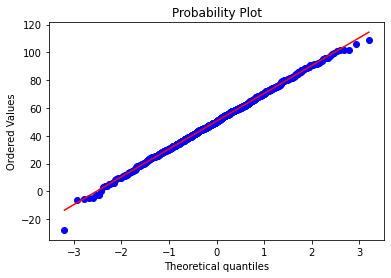

In [ ]:
stats.probplot(meas,dist='norm',plot=pylab)
pylab.show()

In [ ]:
g = np.random.normal(loc=20,scale=5,size=1000)

In [ ]:
d = np.random.normal(loc=5,scale=1,size=1000)

In [ ]:
y= (d-(np.mean(d)))/np.std(d)

In [ ]:
m = np.mean(g)
st = np.std(g)
print(m,st)


19.937697868750405 4.9534500040924065


In [ ]:
t = (g-m)/st

In [ ]:
print(np.mean(t))
print(np.std(t))

5.1514348342607266e-17
0.9999999999999999


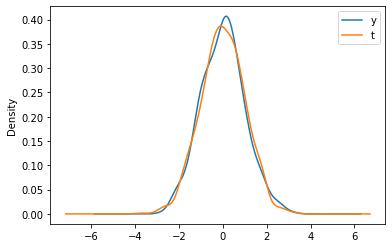

In [ ]:
df = pd.DataFrame({'y':y,'t':t})
df.plot.kde()

(array([ 1.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  4.,  5.,  6., 10., 11.,
        18., 25., 17., 23., 32., 20., 28., 26., 11., 15., 15., 15., 10.,
        13.,  7., 13., 18., 30., 26., 45., 39., 46., 60., 55., 62., 62.,
        58., 35., 36., 36., 23., 14.,  8.,  5.,  6.,  4.,  4.]),
 array([ 0.55956138,  1.62681255,  2.69406373,  3.76131491,  4.82856609,
         5.89581727,  6.96306844,  8.03031962,  9.0975708 , 10.16482198,
        11.23207316, 12.29932434, 13.36657551, 14.43382669, 15.50107787,
        16.56832905, 17.63558023, 18.70283141, 19.77008258, 20.83733376,
        21.90458494, 22.97183612, 24.0390873 , 25.10633847, 26.17358965,
        27.24084083, 28.30809201, 29.37534319, 30.44259437, 31.50984554,
        32.57709672, 33.6443479 , 34.71159908, 35.77885026, 36.84610143,
        37.91335261, 38.98060379, 40.04785497, 41.11510615, 42.18235733,
        43.2496085 , 44.31685968, 45.38411086, 46.45136204, 47.51861322,
        48.5858644 , 49.65311557, 50.72036675, 51.78761793,

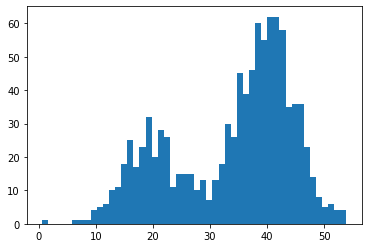

In [ ]:
s1 = np.random.normal(loc=20,scale=5,size=300)
s2 = np.random.normal(loc=40,scale=5,size=700)

sample= np.hstack((s1,s2))
plt.hist(sample,bins=50)


In [ ]:
model = KernelDensity(bandwidth=2,kernel='gaussian')
sample = sample.reshape(len(sample),1)
model.fit(sample)

KernelDensity(algorithm='auto', atol=0, bandwidth=2, breadth_first=True,
              kernel='gaussian', leaf_size=40, metric='euclidean',
              metric_params=None, rtol=0)

In [ ]:
values = np.asarray([val for val in range(1,60)])
values = values.reshape(len(values),1)
prob = model.score_samples(values)
prob = np.exp(prob)

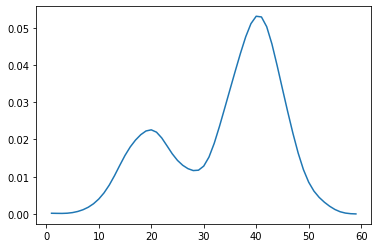

In [ ]:
#plt.hist(sample,bins=50,density=True)
plt.plot(values[:],prob)
plt.show()

In [ ]:
name =['a','b','d','e']
mark = [10,58,97,14]

name.sort(key=lambda x:mark[x])


TypeError: ignored

In [ ]:
words=["b","a","c","d"]
indices=[0,1,2,3]
indices.sort(key=lambda x:words[x])
print(indices)

[1, 0, 2, 3]


In [ ]:
words.sort(key=lambda x:indices[x])

TypeError: ignored

# 23 Stats

In [ ]:
a=[]
for i in range(150):
  a.append(np.random.rand())

b = []
for i in a:
  if i<=0.2:
    b.append(i)
print(len(b))

32


(array([18., 14.,  9., 18., 15.,  9., 16., 19., 11., 21.]), array([0.00215405, 0.10135623, 0.20055841, 0.29976059, 0.39896278,
       0.49816496, 0.59736714, 0.69656932, 0.7957715 , 0.89497368,
       0.99417586]), <a list of 10 Patch objects>)


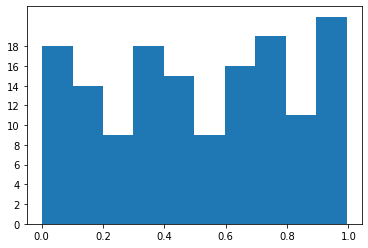

In [ ]:
counts =plt.hist(a)
plt.yticks(np.arange(0,20,2))
print(counts)

(array([18., 14.]),
 array([0.00215405, 0.10067634, 0.19919864]),
 <a list of 2 Patch objects>)

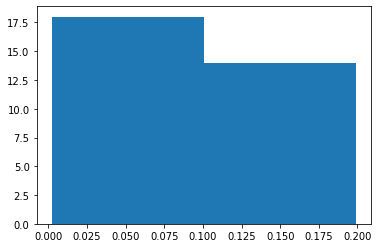

In [ ]:
plt.hist(b,bins=2)

In [ ]:
p =[1,2,4,5,78,7]
np.random.choice(p,2)

array([ 1, 78])

In [ ]:
m = 30
n = 150

sampled = []

for i in range(0,150):
  while i<=m:

    if np.random.random()<=0.2 and len(sampled)<30:
      sampled.append(i)
      i+=1

KeyboardInterrupt: ignored

In [ ]:
d = sns.load_dataset('iris')
d

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

In [ ]:
n = 150
m = 30
p = m/n
sampled = []
for i in range(0,n):
  a = np.random.random()
  if a< p:
    sampled.append(d.iloc[i,:])

print(len(sampled))


32


(array([1.89537836e-02, 3.63531563e-03, 1.60455311e-03, 4.26209419e-04,
        2.75782565e-04, 5.01422845e-05, 7.52134268e-05, 2.50711423e-05,
        0.00000000e+00, 2.50711423e-05]),
 array([  0.60313433,  40.48962969,  80.37612505, 120.26262041,
        160.14911577, 200.03561113, 239.92210649, 279.80860185,
        319.69509721, 359.58159257, 399.46808793]),
 <a list of 10 Patch objects>)

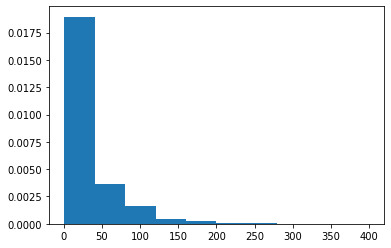

In [ ]:
a = np.random.lognormal(mean = 3,sigma = 1,size=1000 )
plt.hist(a,density=True,align ='mid')


(array([  3.,  16.,  49., 125., 228., 225., 194., 112.,  42.,   6.]),
 array([-0.50561533,  0.14395959,  0.79353451,  1.44310943,  2.09268435,
         2.74225928,  3.3918342 ,  4.04140912,  4.69098404,  5.34055896,
         5.99013388]),
 <a list of 10 Patch objects>)

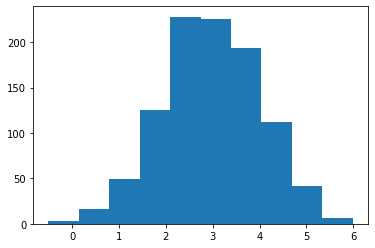

In [ ]:
plt.hist(np.log(a))

In [ ]:
a = (np.random.pareto(3,1000) +1) +1

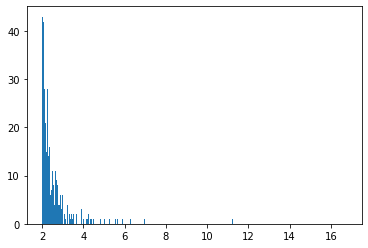

In [ ]:
counts = plt.hist(a,bins = 1000)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


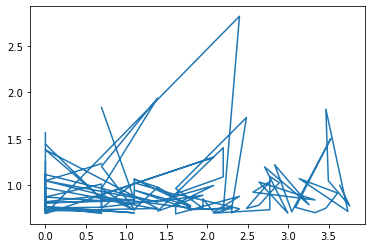

In [ ]:
plt.plot(np.log(counts[0]),np.log(a))

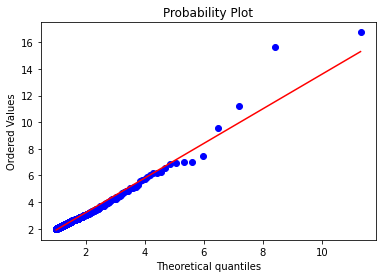

In [ ]:
stats.probplot(a,dist='pareto',plot=pylab,sparams=(3,))
pylab.show()

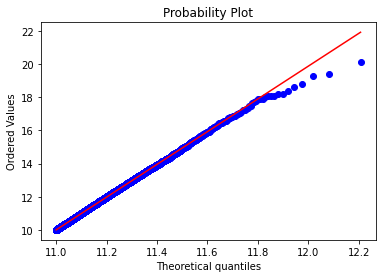

In [ ]:
x_m = 10 

alpha = 15 

size = 100000 #the size of the sample(no. of random samples)

samples = (np.random.pareto(alpha, size) + 1) * x_m

stats.probplot(samples, dist='pareto', sparams=(15, 10), plot=pylab)

plt.show()


In [ ]:
len(a[a<0])

0

In [ ]:
tt,_= stats.boxcox(a)


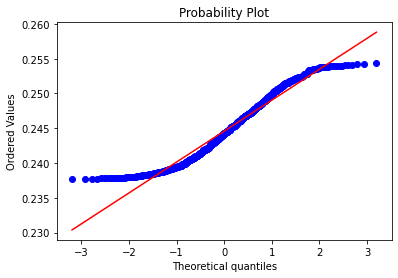

In [ ]:
stats.probplot(tt,dist=stats.norm,plot=pylab)
pylab.show()


(array([151., 132., 109., 115., 118., 106.,  89.,  66.,  67.,  47.]),
 array([0.23770792, 0.23937024, 0.24103256, 0.24269488, 0.2443572 ,
        0.24601951, 0.24768183, 0.24934415, 0.25100647, 0.25266879,
        0.25433111]),
 <a list of 10 Patch objects>)

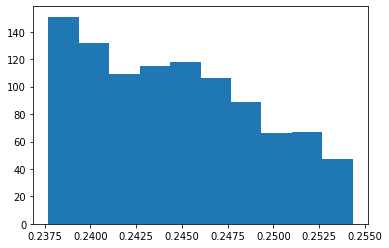

In [ ]:
plt.hist(tt)

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-4.43119801, -4.33119801, -4.23119801, -4.13119801, -4.03119801,
        -3.93119801, -3.83119801, -3.73119801, -3.63119801, -3.53119801,
        -3.43119801]),
 <a list of 10 Patch objects>)

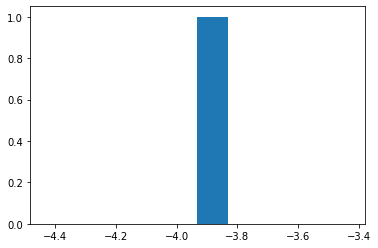

In [ ]:
plt.hist(tt[1])

In [ ]:
x = stats.loggamma.rvs(5, size=500) + 5

(array([  2.,   4.,  16.,  49.,  99., 114., 117.,  69.,  26.,   4.]),
 array([4.73503278, 5.042651  , 5.35026922, 5.65788743, 5.96550565,
        6.27312387, 6.58074209, 6.88836031, 7.19597853, 7.50359675,
        7.81121496]),
 <a list of 10 Patch objects>)

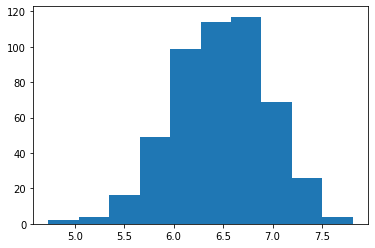

In [ ]:
plt.hist(x)

#28 stats

In [ ]:
x = np.array([180,162,158,172,168,150,171,183,165,176])

In [ ]:
nsize = 1000
n = len(x)

In [ ]:
bmed =[]
for i in range(nsize):
  med = np.median(np.random.choice(x,size = 10 ,replace=True))
  bmed.append(med)

(array([  2.,   8.,  16.,  91., 185., 277., 286.,  67.,  40.,  28.]),
 array([154. , 156.6, 159.2, 161.8, 164.4, 167. , 169.6, 172.2, 174.8,
        177.4, 180. ]),
 <a list of 10 Patch objects>)

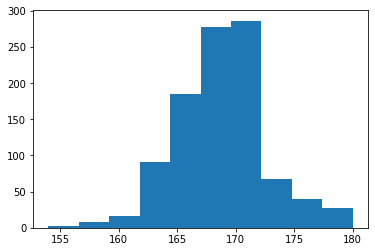

In [ ]:
plt.hist(bmed)

In [ ]:
np.percentile(bmed,[2.5,97.5])

array([161.5, 178. ])

#29 Pca

In [ ]:
data = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
data

In [ ]:
kaggle competitions download -c digit-recognizer

In [ ]:
data = pd.read_csv('train.csv')

In [ ]:
data.head()

In [ ]:
df= pd.read_csv('mnist_train.csv')

In [ ]:
df.head()

label  pixel0  pixel1  pixel2  ...  pixel780  pixel781  pixel782  pixel783
0      1       0       0       0  ...         0         0         0         0
1      0       0       0       0  ...         0         0         0         0
2      1       0       0       0  ...         0         0         0         0
3      4       0       0       0  ...         0         0         0         0
4      0       0       0       0  ...         0         0         0         0

[5 rows x 785 columns]

In [ ]:
df.shape

(42000, 785)

In [ ]:
l = df['label']

In [ ]:
d = df.drop(columns='label')

In [ ]:
d

pixel0  pixel1  pixel2  pixel3  ...  pixel780  pixel781  pixel782  pixel783
0           0       0       0       0  ...         0         0         0         0
1           0       0       0       0  ...         0         0         0         0
2           0       0       0       0  ...         0         0         0         0
3           0       0       0       0  ...         0         0         0         0
4           0       0       0       0  ...         0         0         0         0
...       ...     ...     ...     ...  ...       ...       ...       ...       ...
41995       0       0       0       0  ...         0         0         0         0
41996       0       0       0       0  ...         0         0         0         0
41997       0       0       0       0  ...         0         0         0         0
41998       0       0       0       0  ...         0         0         0         0
41999       0       0       0       0  ...         0         0         0         0

[42000 rows x 784 columns]

In [ ]:
from sklearn.preprocessing import StandardScaler
stan = StandardScaler().fit_transform(d)
c = stan
a = np.matmul(c.T,c)

In [ ]:
from scipy.linalg import eigh

values,vect = eigh(a)

In [ ]:
values

# 5 9 Mnist data

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df.head()

label  pixel0  pixel1  pixel2  ...  pixel780  pixel781  pixel782  pixel783
0      1       0       0       0  ...         0         0         0         0
1      0       0       0       0  ...         0         0         0         0
2      1       0       0       0  ...         0         0         0         0
3      4       0       0       0  ...         0         0         0         0
4      0       0       0       0  ...         0         0         0         0

[5 rows x 785 columns]

In [ ]:
df.shape

(42000, 785)

In [ ]:
l = df['label']

In [ ]:
d = df.drop('label',axis=1)

In [ ]:
d.shape

(42000, 784)

9


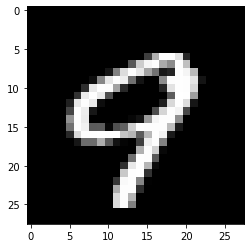

In [ ]:
grid_data = d.iloc[100].to_numpy().reshape(28,28)
plt.imshow(grid_data,cmap='gray')
print(l[100])

In [ ]:
print(l.iloc[100])

9


In [ ]:
plt.figure(figsize=(7,7))
idx = 1

grid_data = d.iloc[idx].as_matrix().reshape(28,28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()


AttributeError: ignored

<Figure size 504x504 with 0 Axes>

In [ ]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()

In [ ]:
labels = l.head(15000)
data = d.head(15000)

In [ ]:
print(labels.shape)
print(data.shape)

(15000,)
(15000, 784)


In [ ]:
data_std = st.fit_transform(data)
print(data.shape)

(15000, 784)


In [ ]:
data_cov = np.cov(data_std.T)

In [ ]:
data_cov.shape

(784, 784)

In [ ]:
a = data_cov.shape

In [ ]:
data_cov == data_x

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [ ]:
data_x[187][87]

211.77807267237358

In [ ]:
data_cov[187][87]

0.014119479476790025

In [ ]:
def areSame(A,B):

   for i in range(n):
      for j in range(n):
         if (A[i][j] == B[i][j]):
            return 0
   return 1
n = 784

In [ ]:
areSame(data_x,data_cov)

0

In [ ]:
data_x = np.matmul(data_std.T,data_std)
data_x.shape

(784, 784)

In [ ]:
b.shape

(784, 784)

In [ ]:
a==b

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


False

In [ ]:
x = np.array([[1,2],[3,4]])
print(x)


[[1 2]
 [3 4]]


In [ ]:
x = StandardScaler().fit_transform(x)
print(x)

[[-1. -1.]
 [ 1.  1.]]


In [ ]:
print(x)

[[-1. -1.]
 [ 1.  1.]]


In [ ]:
np.std([2,4])

1.0

In [ ]:
y = [[-1,1],[-1,1]]

In [ ]:
np.cov(y)

array([[2., 2.],
       [2., 2.]])

In [ ]:
print(np.matmul(x.T,x))

[[2. 2.]
 [2. 2.]]


In [ ]:
x = [-2.1, -1,  4.3]
y = [3,  1.1,  0.12]
X = np.stack((x, y), axis=0)
print(X)
print(np.cov(X))

[[-2.1  -1.    4.3 ]
 [ 3.    1.1   0.12]]
[[11.71       -4.286     ]
 [-4.286       2.14413333]]


In [ ]:
np.cov(x)

array(11.71)

In [ ]:
labels = l.head(15000)
data = d.head(15000)

In [ ]:
data_std = StandardScaler().fit_transform(data)

In [ ]:
data_std[:,5].mean()

0.0

In [ ]:
data_cov = np.matmul(data_std.T,data_std)

In [ ]:
data_cov.shape

(784, 784)

In [ ]:
data_np = np.cov(data_std.T)

In [ ]:
data_np.shape

(784, 784)

In [ ]:

data_cov[100,78] == data_np[100,78]

False

In [ ]:
areSame(data_cov,data_np)

0

In [ ]:
x = np.array([[5,4,7,8,9,5,4,1],
     [10,1,4,2,6,32,7,8],
     [7,8,7,1,5,4,7,8],
     [7,5,3,6,9,8,1,4],
     [7,14,2,3,5,2,8,8]])


In [ ]:
x.shape

(5, 8)

In [ ]:
x = StandardScaler().fit_transform(x)
print(x)

[[-1.375      -0.54433105  1.16554303  1.53392998  1.2001984  -0.46970909
  -0.54330537 -1.6803361 ]
 [ 1.75       -1.22474487 -0.29138576 -0.76696499 -0.43643578  1.96916504
   0.62092042  0.77015405]
 [-0.125       0.36288737  1.16554303 -1.15044748 -0.98198051 -0.56003776
   0.62092042  0.77015405]
 [-0.125      -0.31752645 -0.77702869  0.76696499  1.2001984  -0.19872308
  -1.70753116 -0.63012604]
 [-0.125       1.723715   -1.26267162 -0.38348249 -0.98198051 -0.74069511
   1.00899568  0.77015405]]


In [ ]:
print(np.cov(x.T))

[[ 1.25       -0.4039957  -0.50081927 -0.83886796 -0.57964127  1.06983021
   0.46083937  0.88611474]
 [-0.4039957   1.25       -0.44609152 -0.30441459 -0.63722009 -0.8932314
   0.51050009  0.44462596]
 [-0.50081927 -0.44609152  1.25        0.13967667  0.17221096 -0.17108318
  -0.0094233  -0.44202348]
 [-0.83886796 -0.30441459  0.13967667  1.25        1.15063769 -0.36371438
  -0.93012544 -1.20821152]
 [-0.57964127 -0.63722009  0.17221096  1.15063769  1.25       -0.09609274
  -1.14324703 -1.15542206]
 [ 1.06983021 -0.8932314  -0.17108318 -0.36371438 -0.09609274  1.25
   0.18052976  0.35732137]
 [ 0.46083937  0.51050009 -0.0094233  -0.93012544 -1.14324703  0.18052976
   1.25        0.93059658]
 [ 0.88611474  0.44462596 -0.44202348 -1.20821152 -1.15542206  0.35732137
   0.93059658  1.25      ]]


In [ ]:
print(np.matmul(x.T,x)/4)

[[ 1.25       -0.4039957  -0.50081927 -0.83886796 -0.57964127  1.06983021
   0.46083937  0.88611474]
 [-0.4039957   1.25       -0.44609152 -0.30441459 -0.63722009 -0.8932314
   0.51050009  0.44462596]
 [-0.50081927 -0.44609152  1.25        0.13967667  0.17221096 -0.17108318
  -0.0094233  -0.44202348]
 [-0.83886796 -0.30441459  0.13967667  1.25        1.15063769 -0.36371438
  -0.93012544 -1.20821152]
 [-0.57964127 -0.63722009  0.17221096  1.15063769  1.25       -0.09609274
  -1.14324703 -1.15542206]
 [ 1.06983021 -0.8932314  -0.17108318 -0.36371438 -0.09609274  1.25
   0.18052976  0.35732137]
 [ 0.46083937  0.51050009 -0.0094233  -0.93012544 -1.14324703  0.18052976
   1.25        0.93059658]
 [ 0.88611474  0.44462596 -0.44202348 -1.20821152 -1.15542206  0.35732137
   0.93059658  1.25      ]]


In [ ]:
5/1.25

4.0

In [ ]:
labels = l.head(15000).to_numpy()
data = d.head(15000)

In [ ]:
data = StandardScaler().fit_transform(data)

In [ ]:
data.shape

(15000, 784)

In [ ]:
cov_data = np.matmul(data.T,data)

In [ ]:
cov_data.shape

(784, 784)

In [ ]:
from scipy.linalg import eigh

In [ ]:
values,vectors = eigh(cov_data,eigvals=(782,783))

In [ ]:
vectors.shape

(784, 2)

In [ ]:
vectors.shape

(784, 2)

In [ ]:
new_data = np.matmul(data,vectors)
type(new_data)

numpy.ndarray

In [ ]:
print(new_data.shape)
print(labels.shape)

(15000, 2)
(15000,)


In [ ]:
labels =labels.reshape(15000,1)

In [ ]:
final = np.stack((new_data,labels),axis=1)

ValueError: ignored

In [ ]:
new_data=new_data.T

In [ ]:
new_data.shape

(15000, 2)

In [ ]:
labels.as_matrix().reshape(15000,1)

AttributeError: ignored

In [ ]:
final = pd.concat(new_data,labels)

TypeError: ignored

In [ ]:
type(labels)

pandas.core.series.Series

In [ ]:
new_data = pd.DataFrame(new_data)

In [ ]:
final.concat(labels)

AttributeError: ignored

In [ ]:
df

label  pixel0  pixel1  pixel2  ...  pixel780  pixel781  pixel782  pixel783
0          1       0       0       0  ...         0         0         0         0
1          0       0       0       0  ...         0         0         0         0
2          1       0       0       0  ...         0         0         0         0
3          4       0       0       0  ...         0         0         0         0
4          0       0       0       0  ...         0         0         0         0
...      ...     ...     ...     ...  ...       ...       ...       ...       ...
41995      0       0       0       0  ...         0         0         0         0
41996      1       0       0       0  ...         0         0         0         0
41997      7       0       0       0  ...         0         0         0         0
41998      6       0       0       0  ...         0         0         0         0
41999      9       0       0       0  ...         0         0         0         0

[42000 rows x 785 columns]

In [ ]:
labels = l
data = d

In [ ]:
l = df['label']
d = df.drop(columns='label')

In [ ]:
print(labels.shape)
print(data.shape)

(42000,)
(42000, 784)


In [ ]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(42000, 784)


In [ ]:
sample_data = standardized_data

# matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T , sample_data)

print ( "The shape of variance matrix = ", covar_matrix.shape)

The shape of variance matrix =  (784, 784)


In [ ]:
from scipy.linalg import eigh 

# the parameter 'eigvals' is defined (low value to heigh value) 
# eigh function will return the eigen values in asending order
# this code generates only the top 2 (782 and 783) eigenvalues.
values, vectors = eigh(covar_matrix, eigvals=(782,783))

print("Shape of eigen vectors = ",vectors.shape)
# converting the eigen vectors into (2,d) shape for easyness of further computations
vectors = vectors.T

print("Updated shape of eigen vectors = ",vectors.shape)

Shape of eigen vectors =  (784, 2)
Updated shape of eigen vectors =  (2, 784)


In [ ]:
import matplotlib.pyplot as plt
new_coordinates = np.matmul(vectors, sample_data.T)

print (" resultanat new data points' shape ", vectors.shape, "X", sample_data.T.shape," = ", new_coordinates.shape)

 resultanat new data points' shape  (2, 784) X (784, 42000)  =  (2, 42000)


In [ ]:
import pandas as pd

# appending label to the 2d projected data
new_coordinates = np.vstack((new_coordinates, labels)).T

# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -5.226445      -5.140478    1.0
1       6.032996      19.292332    0.0
2      -1.705813      -7.644503    1.0
3       5.836139      -0.474207    4.0
4       6.024818      26.559574    0.0


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


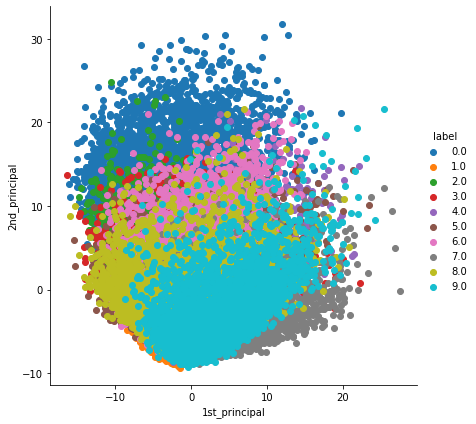

In [ ]:
import seaborn as sn
sn.FacetGrid(dataframe, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

In [ ]:
from sklearn import decomposition

In [ ]:
pca = decomposition.PCA(n_components=2)


In [ ]:
data = pca.fit_transform(sample_data)

In [ ]:
data.shape

(42000, 2)

In [ ]:
pc = np.vstack((data.T,labels)).T

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


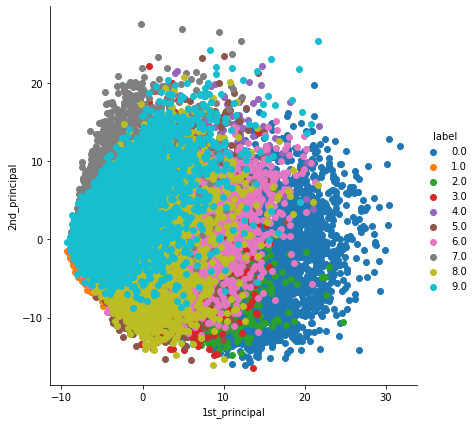

In [ ]:
pca_df = pd.DataFrame(data=pc, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

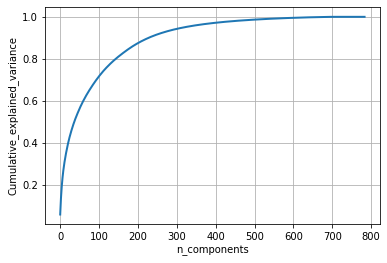

In [ ]:
pca.n_components = 784
pca_data = pca.fit_transform(sample_data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()



/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


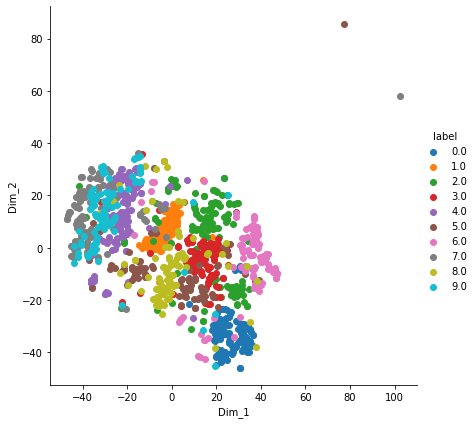

In [ ]:
# TSNE

from sklearn.manifold import TSNE

# Picking the top 1000 points as TSNE takes a lot of time for 15K points
data_1000 = standardized_data[0:1000,:]
labels_1000 = labels[0:1000]

model = TSNE(n_components=2, random_state=0)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(data_1000)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

#Plotting

In [ ]:
iris = load_iris()

In [ ]:
type(df)

In [ ]:
df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
data = pd.DataFrame(iris['data'])
target = pd.DataFrame(iris['target'])

In [ ]:
data.merge(target, on ='')

In [ ]:
df = pd.concat([data,target], axis =1)

In [ ]:
df.columns = ['sl','sw','pl','pw','target']

In [ ]:
df

sl   sw   pl   pw  target
0    5.1  3.5  1.4  0.2       0
1    4.9  3.0  1.4  0.2       0
2    4.7  3.2  1.3  0.2       0
3    4.6  3.1  1.5  0.2       0
4    5.0  3.6  1.4  0.2       0
..   ...  ...  ...  ...     ...
145  6.7  3.0  5.2  2.3       2
146  6.3  2.5  5.0  1.9       2
147  6.5  3.0  5.2  2.0       2
148  6.2  3.4  5.4  2.3       2
149  5.9  3.0  5.1  1.8       2

[150 rows x 5 columns]

In [ ]:
df.columns

Index(['0', '1', '2', '3', 'target'], dtype='object')

In [ ]:
df.shape

(150, 5)

In [ ]:
df.describe()

0           1           2           3      target
count  150.000000  150.000000  150.000000  150.000000  150.000000
mean     5.843333    3.057333    3.758000    1.199333    1.000000
std      0.828066    0.435866    1.765298    0.762238    0.819232
min      4.300000    2.000000    1.000000    0.100000    0.000000
25%      5.100000    2.800000    1.600000    0.300000    0.000000
50%      5.800000    3.000000    4.350000    1.300000    1.000000
75%      6.400000    3.300000    5.100000    1.800000    2.000000
max      7.900000    4.400000    6.900000    2.500000    2.000000

In [ ]:
df['target'].value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

In [ ]:
df.plot(kind = 'scatter', x = 'sl',y = 'sw')
plt

In [ ]:

sns.pairplot(df, hue ='target',size =3)

In [ ]:
help(np.histogram)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated

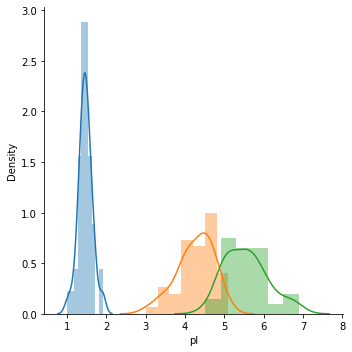

In [ ]:
sns.FacetGrid(df, hue = 'target', size = 5) \
.map(sns.distplot ,'pl')
plt.show()

In [ ]:
count, bin_edges = np.histogram(df['pl'],bins = 10, density = True)

In [ ]:
print(count, len(count))
print(bin_edges, len(bin_edges))


[0.4180791  0.14689266 0.         0.03389831 0.09039548 0.29378531
 0.32768362 0.20338983 0.12429379 0.05649718] 10
[1.   1.59 2.18 2.77 3.36 3.95 4.54 5.13 5.72 6.31 6.9 ] 11


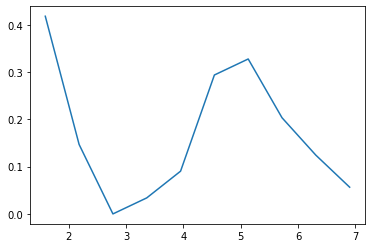

In [ ]:
plt.plot(bin_edges[1:], count)

In [ ]:
print(type(count))

<class 'numpy.ndarray'>


In [ ]:
pdf = count/(sum(count))
cdf = np.cumsum(pdf)

print(pdf,len(pdf))
print(cdf,len(cdf))

[0.24666667 0.08666667 0.         0.02       0.05333333 0.17333333
 0.19333333 0.12       0.07333333 0.03333333] 10
[0.24666667 0.33333333 0.33333333 0.35333333 0.40666667 0.58
 0.77333333 0.89333333 0.96666667 1.        ] 10


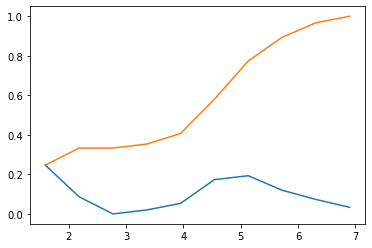

In [ ]:
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:],cdf)

count [0.4180791  0.14689266 0.         0.03389831 0.09039548 0.29378531
 0.32768362 0.20338983 0.12429379 0.05649718] 10
#####
bin [1.   1.59 2.18 2.77 3.36 3.95 4.54 5.13 5.72 6.31 6.9 ]
pdf [0.24666667 0.08666667 0.         0.02       0.05333333 0.17333333
 0.19333333 0.12       0.07333333 0.03333333]
cdf [0.24666667 0.33333333 0.33333333 0.35333333 0.40666667 0.58
 0.77333333 0.89333333 0.96666667 1.        ]


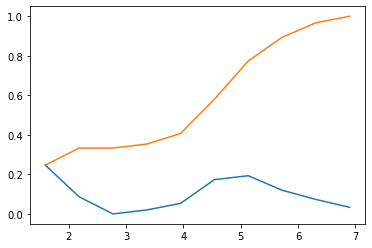

In [ ]:
count, bin = np.histogram(df['pl'],bins = 10, density = True)

print('count',count, len(count))
print('#####')
print('bin',bin)


pdf = count/sum(count)
cdf = np.cumsum(pdf)
print('pdf', pdf)
print('cdf',cdf)

plt.plot(bin[1:],pdf)
plt.plot(bin[1:],cdf)

In [ ]:
df['pl'].sum()

563.7

In [ ]:
df

sl   sw   pl   pw  target
0    5.1  3.5  1.4  0.2       0
1    4.9  3.0  1.4  0.2       0
2    4.7  3.2  1.3  0.2       0
3    4.6  3.1  1.5  0.2       0
4    5.0  3.6  1.4  0.2       0
..   ...  ...  ...  ...     ...
145  6.7  3.0  5.2  2.3       2
146  6.3  2.5  5.0  1.9       2
147  6.5  3.0  5.2  2.0       2
148  6.2  3.4  5.4  2.3       2
149  5.9  3.0  5.1  1.8       2

[150 rows x 5 columns]

In [ ]:
df.shape

(150, 5)

In [ ]:
df['target'].value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

In [ ]:
 def_set = df[df['target'] == 0]

In [ ]:
def_set['target'].value_counts()

0    50
Name: target, dtype: int64

In [ ]:
df['target'].value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

In [ ]:
df.columns

Index(['sl', 'sw', 'pl', 'pw', 'target'], dtype='object')

In [ ]:
fd = df[df['sl'] == '0']

In [ ]:
fd.head()

Empty DataFrame
Columns: [sl, sw, pl, pw, target]
Index: []

In [ ]:
df_set.head()

Empty DataFrame
Columns: [sl, sw, pl, pw, target]
Index: []

/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


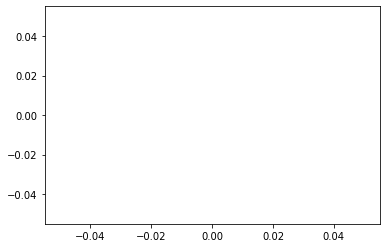

In [ ]:
count, bin = np.histogram(df_setosa['pl'], bins = 10, density = True)

pdf = count/(sum(count))
cdf = np.cumsum(pdf)

plt.plot(bin[1:],pdf)
plt.plot(bin[1:],cdf)

In [ ]:
print(pdf)
print(cdf)

[nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan]


In [ ]:
a = list(np.arange(10,20))
b = list(np.arange(10))

print(a)
print(b)

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [ ]:
def binary(a,f,l,q):
  if l >= f:

    # mid
    mid = (f+l)//2
    print(mid)

    if a[mid] == q:
      return 1
    
    if q < a[mid]:
      l = mid-1
      print(f,l)
      return binary(a,f,l,q)
    else:
      f = mid +1
      print(f,l)
      return binary(a,f,l,q)
  else:
    return -1

In [ ]:
binary(a,0,len(a),10)

5
0 4
2
0 1
0


1

#pca and tsne

In [ ]:
print(random.random())

0.5483067525345454


In [ ]:
a = []
for i in range(100):
  a.append(random.random())
  i +=1

In [ ]:
no = np.random.normal(loc =0, scale = 1,size = 1000)
meas=[]
for i in range(100):
  meas.append(np.percentile(no,i))

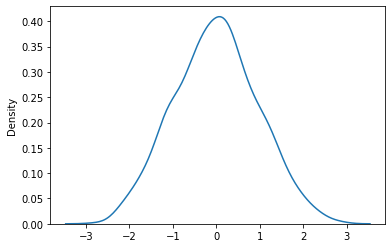

In [ ]:
sns.kdeplot(no)

In [ ]:
stats.probplot(meas, dist='norm',plot=pylab)

In [ ]:
stats.kstest(meas,'norm')

KstestResult(statistic=0.021549543293995554, pvalue=0.9999999999662723)

In [ ]:
df = pd.read_csv('/content/sample_data/mnist_test.csv')

In [ ]:
df.shape

(9999, 785)

In [ ]:
df.columns

Index(['7', '0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8',
       ...
       '0.658', '0.659', '0.660', '0.661', '0.662', '0.663', '0.664', '0.665',
       '0.666', '0.667'],
      dtype='object', length=785)

In [ ]:
df_data = df.loc[:,'0':]

In [ ]:
df_data.head()

0  0.1  0.2  0.3  0.4  0.5  ...  0.662  0.663  0.664  0.665  0.666  0.667
0  0    0    0    0    0    0  ...      0      0      0      0      0      0
1  0    0    0    0    0    0  ...      0      0      0      0      0      0
2  0    0    0    0    0    0  ...      0      0      0      0      0      0
3  0    0    0    0    0    0  ...      0      0      0      0      0      0
4  0    0    0    0    0    0  ...      0      0      0      0      0      0

[5 rows x 784 columns]

In [ ]:
df.iloc[2]

7        0
0        0
0.1      0
0.2      0
0.3      0
        ..
0.663    0
0.664    0
0.665    0
0.666    0
0.667    0
Name: 2, Length: 785, dtype: int64

In [3]:
df = pd.read_csv('/content/sample_data/california_housing_train.csv')

In [4]:
df.head()

longitude  latitude  ...  median_income  median_house_value
0    -114.31     34.19  ...         1.4936             66900.0
1    -114.47     34.40  ...         1.8200             80100.0
2    -114.56     33.69  ...         1.6509             85700.0
3    -114.57     33.64  ...         3.1917             73400.0
4    -114.57     33.57  ...         1.9250             65500.0

[5 rows x 9 columns]

In [ ]:
df.shape

(17000, 9)

In [ ]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [ ]:
df.loc[[0,1,3]]

longitude  latitude  ...  median_income  median_house_value
0    -114.31     34.19  ...         1.4936             66900.0
1    -114.47     34.40  ...         1.8200             80100.0
3    -114.57     33.64  ...         3.1917             73400.0

[3 rows x 9 columns]

In [ ]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [ ]:
df_new = df.drop(['longitude'],axis = 1)

In [ ]:
df_new.head()

latitude  housing_median_age  ...  median_income  median_house_value
0     34.19                15.0  ...         1.4936             66900.0
1     34.40                19.0  ...         1.8200             80100.0
2     33.69                17.0  ...         1.6509             85700.0
3     33.64                14.0  ...         3.1917             73400.0
4     33.57                20.0  ...         1.9250             65500.0

[5 rows x 8 columns]

In [ ]:
df.corr()

In [ ]:
df.plot('longitude','latitude', kind = 'scatter')

In [ ]:
np.corrcoef(df['longitude'],df['latitude'])

array([[ 1.        , -0.92520828],
       [-0.92520828,  1.        ]])

In [ ]:
df

In [2]:
df[2]

NameError: ignored

In [6]:
{
    'name'
}

longitude  latitude  ...  median_income  median_house_value
2    -114.56     33.69  ...         1.6509             85700.0

[1 rows x 9 columns]

In [7]:
a = pd.Series([1,4,7,8,9,1])

In [10]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [12]:
a = df.iloc[:,[0,1]].values

In [17]:
a

array([[-114.31,   34.19],
       [-114.47,   34.4 ],
       [-114.56,   33.69],
       ...,
       [-124.3 ,   41.84],
       [-124.3 ,   41.8 ],
       [-124.35,   40.54]])

In [20]:
df

longitude  latitude  ...  median_income  median_house_value
0        -114.31     34.19  ...         1.4936             66900.0
1        -114.47     34.40  ...         1.8200             80100.0
2        -114.56     33.69  ...         1.6509             85700.0
3        -114.57     33.64  ...         3.1917             73400.0
4        -114.57     33.57  ...         1.9250             65500.0
...          ...       ...  ...            ...                 ...
16995    -124.26     40.58  ...         2.3571            111400.0
16996    -124.27     40.69  ...         2.5179             79000.0
16997    -124.30     41.84  ...         3.0313            103600.0
16998    -124.30     41.80  ...         1.9797             85800.0
16999    -124.35     40.54  ...         3.0147             94600.0

[17000 rows x 9 columns]

In [22]:
df[:,[5]]

TypeError: ignored

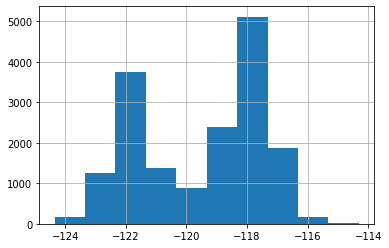

In [23]:
df['longitude'].hist()

In [37]:
df_sort = df.sort_values(['housing_median_age','total_bedrooms'],ascending = [False, False])

In [38]:
df_sort.head()

longitude  latitude  ...  median_income  median_house_value
15773    -122.41     37.79  ...         1.7240            225000.0
15772    -122.41     37.79  ...         2.5166            275000.0
6274     -118.25     34.05  ...         0.6775            350000.0
15761    -122.41     37.80  ...         0.9000            500001.0
7384     -118.35     34.06  ...         2.4722            500001.0

[5 rows x 9 columns]

In [39]:
df_sort.tail()

longitude  latitude  ...  median_income  median_house_value
1834     -117.27     33.93  ...         3.1042            164800.0
13345    -121.93     37.78  ...         3.1591            434700.0
113      -115.80     33.26  ...         5.3374             47500.0
13708    -122.00     38.23  ...         5.2636            191300.0
10993    -120.93     37.65  ...         4.2500            189200.0

[5 rows x 9 columns]

In [41]:
df_sorted = df[(df['housing_median_age'] > 50) & (df['total_bedrooms'] > 2000)]

In [42]:
df_sorted

longitude  latitude  ...  median_income  median_house_value
15772    -122.41     37.79  ...         2.5166            275000.0
15773    -122.41     37.79  ...         1.7240            225000.0

[2 rows x 9 columns]

In [54]:
df[['latitude','longitude']].agg('var')

latitude     4.568221
longitude    4.020692
dtype: float64

In [58]:
df.duplicated().value_counts()

False    17000
dtype: int64